In [11]:
from sklearn.datasets import load_digits
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
digits = load_digits()

In [4]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
X, y = digits['data'] , digits['target']

In [7]:
X.shape

(1797, 64)

In [8]:
X[0, :]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [10]:
X[0,:].reshape([8,8])

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

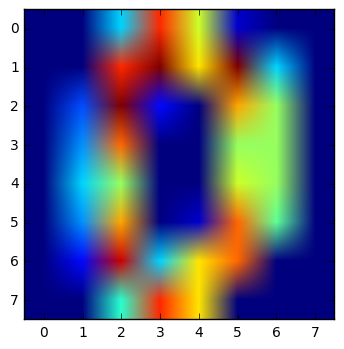

In [12]:
plt.imshow(X[0,:].reshape([8,8]))

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=7)

In [16]:
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
import numpy as np
np.bincount(y)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [28]:
for (train_ix, test_ix) in KFold(n_splits=5).split(X_train):
    pass

In [29]:
kf = KFold(n_splits=5)

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
logit = LogisticRegression(n_jobs=-1, random_state=7)
forest = RandomForestClassifier(random_state=7)

In [44]:
np.mean(cross_val_score(knn, X_train, y_train, cv=kf))

0.98885410738000379

In [45]:
np.mean(cross_val_score(logit, X_train, y_train, cv=kf))

0.95861949029279714

In [46]:
np.mean(cross_val_score(forest, X_train, y_train, cv=kf))

0.94032441661923727

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
knn.fit(X_train, y_train)
logit.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [49]:
accuracy_score(y_test, knn.predict(X_test))

0.98333333333333328

In [50]:
accuracy_score(y_test, logit.predict(X_test))

0.9462962962962963

In [51]:
accuracy_score(y_test, forest.predict(X_test))

0.93518518518518523